In [1]:
from interpolation import divided_differences
from initial_value_problem import first_order_differential_equation

from matplotlib import pyplot as plt
import sympy as sp
import numpy as np

sp.init_printing()
def plot(u_, x_, f_ux, u_analytic):
    plt.grid()
    plt.plot(x_, u_, label='approximation')
    plt.plot(x_, u_analytic, label='analytic solution')
    plt.legend()
    plt.title('$i\'(t)='+sp.latex(f_ux)+'$')
    plt.show()
    

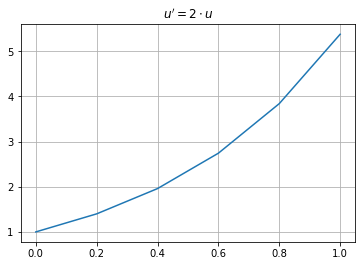

In [2]:
x = sp.Symbol('x')
u = sp.Symbol('u')
f_ux = 2*u
x_ = np.linspace(0, 1, 6)
u0 = 1

u_ = first_order_differential_equation(
    f_ux, u, x, x_, u0
)
plt.grid()
plt.plot(x_, u_)
plt.title('$u\' = 2\cdot u$')
plt.show()

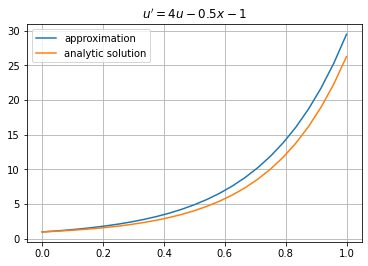

In [3]:
x = sp.Symbol('x')
u = sp.Symbol('u')

f_ux = 4*u-(1 + 0.5*x)
x_ = np.linspace(0, 1,25)
u0 = 1

u_ = first_order_differential_equation(
    f_ux, u, x, x_, u0
)

f = 0.53125 + 0.46875 *sp.exp(4*x) + 0.125* x

x1 = np.linspace(0, 1, 25)
y1 = [f.subs(x, a) for a in x1]

plt.grid()
plt.plot(x_, u_, label='approximation')
plt.plot(x1, y1, label='analytic solution')
plt.legend()

plt.title('$u\'='+sp.latex(f_ux)+'$')
plt.show()

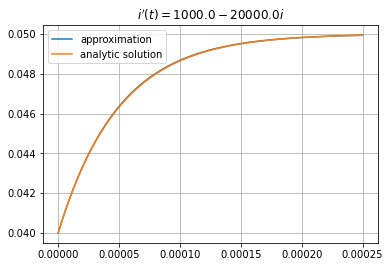

In [4]:


t = sp.Symbol('t')
i = sp.Symbol('i')

L = 60 * 10**(-3)
R = 1.2 * 10**(3)
V = 60
i0 = 40 * 10**(-3)
f_ti = V/L - R*i/L

ct = 5 * L/R
t_ = np.linspace(0, ct, 250)

i_analytic = 0.05-0.01*sp.exp(-20000*t)
i1 = [i_analytic.subs(t, a) for a in t_]

i_ = first_order_differential_equation(f_ti, i, t, t_, i0)
plot(i_, t_, f_ti, i1)

In [5]:
from regression import general_regression
r = general_regression([t**0, sp.exp(-R*t/L)], t, t_, i_)
r

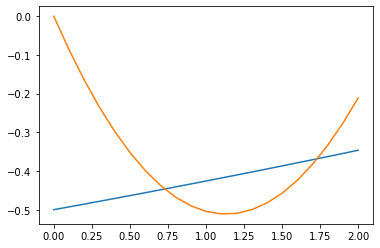

In [6]:
x = sp.Symbol('x')
x_ = np.arange(0,2.1,0.1)
y_ = np.exp(x_/14) - 1.5
f0 = [x, x**2]


f = general_regression(f0, x, x_, y_)
y2 = [f.subs(x, x0) for x0 in x_]
plt.plot(x_, y_)
plt.plot(x_, y2)

In [7]:
from interpolation import lagrangian_polynomial

lagrangian_polynomial([-np.pi/2, np.pi/2], [-1, 1], x)

In [8]:
from regression import linear_regression
x_ = np.linspace(0, np.pi/2, 31, endpoint=True)
y_ = np.sin(x_) + 1/8 * np.cos(2*x_)

linear_regression(x, x_, y_)

In [9]:
from interpolation import divided_differences
x_ = np.arange(37, 41)
y_ = np.sin(x_) * np.cos(x_)

divided_differences(x_, y_, x).subs(x, 38.92)

In [15]:
from initial_value_problem import first_order_differential_equation_final_value

u = sp.Symbol('u')
x = sp.Symbol('x')

f_ux = sp.sin(2*x - u)
u0 = 2

x_ = np.linspace(1,5, 10**3)

first_order_differential_equation_final_value(f_ux, u, x, x_, u0)


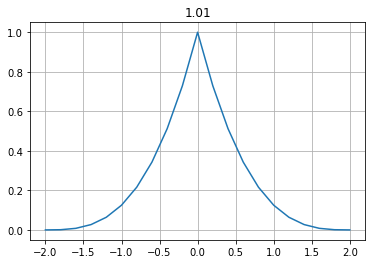

In [38]:
from integration import trapezium_integrate
x_ = np.linspace(-2, 2, 21)
y_ = (1 - np.abs(x_/2))**3


plt.title(trapezium_integrate(x_, y_))
plt.grid()
plt.plot(x_, y_)

In [62]:
from integration import trapezium_integrate
x_ = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
y_ = 2 + np.cos(x_)

s1 = 2*0.6 + np.sin(0.6) - (2*0.1 + np.sin(0.1))

s0 = trapezium_integrate(x_, y_)
print(s0 - s1)


-0.00038740545281168437


In [55]:
from initial_value_problem import first_order_differential_equation_final_value as pvi_edo

t, u = sp.symbols(['t', 'u'])
f_ut = t + 11 - u
u0 = 2
t_ = np.arange(1, 3.1, 0.1)

pvi_edo(f_ut, u, t, t_, u0)


In [59]:
x = sp.Symbol('x')
f = x*sp.exp(-9*x**2)
i = sp.integrate(f, x)
float(i.subs(x, 1) - i.subs(x, 1/4))